# Import the required libraries

In [114]:
import os
from pathlib import Path
import numpy as np
import cv2 
import random
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [115]:
class_names:list=["buildings","forest","glacier","mountain","sea","street"]

In [116]:
labels:dict={class_name:label for label,class_name in enumerate(class_names)}
print(labels)


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [117]:
def load_data(path: str, mode: str = 'BGR2RGB', size: tuple = (32,32)) -> tuple:
    images = []
    labels_ = []
    class_names = []

    # Get all class directories
    class_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(path, class_dir)
        
        # Get all image files in the class directory
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        
        for img_name in image_files:
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image with OpenCV
                img = cv2.imread(img_path)
                 # Convert the image based on the mode parameter
                if mode == 'BGR2RGB':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                elif mode == 'GRAY':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                else:
                    raise ValueError(f"Unsupported mode: {mode}")

                # Resize the image to the specified size
                img = cv2.resize(img, size)
                images.append(img)
                labels_.append(labels[class_dir])
                class_names.append(class_dir)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    images = np.array(images)
    labels_ = np.array(labels_)    
    class_names = np.array(class_names)


    return images, labels_,class_names



### Load Train Data

In [118]:
X_train, y_train, train_class_name = load_data('./archive/seg_train/seg_train')

print(X_train.shape)
print(y_train.shape)
print(train_class_name.shape)

(14034, 32, 32, 3)
(14034,)
(14034,)


### Load Test Data

In [119]:
X_test, y_test, test_class_name = load_data('./archive/seg_test/seg_test')

print(X_test.shape)
print(y_test.shape)
print(test_class_name.shape)

(3000, 32, 32, 3)
(3000,)
(3000,)


### Visualize Data

In [120]:

def display_examples(class_names, images, labels):
    """
        Display 10 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = np.random.randint(images.shape[0])
        plt.imshow(images[index], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[index]])
    plt.show()

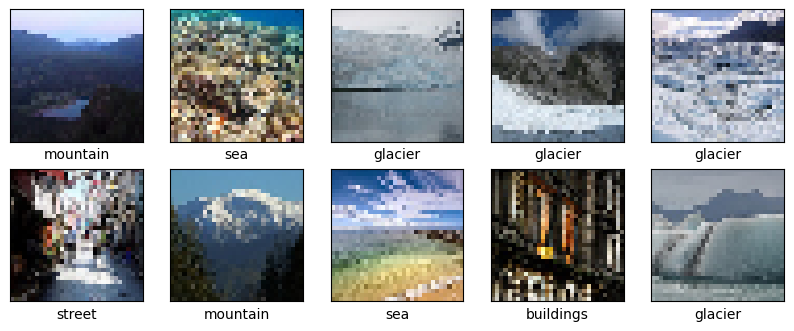

In [121]:
display_examples(class_names, X_train, y_train)

### Normalize Data

In [122]:
print(X_train[0].max())
print(X_train[0].min())

# valores iniciais do X_train
print(X_train[0])

248
0
[[[111 132 100]
  [167 208 169]
  [ 78  89  85]
  ...
  [131 174  71]
  [ 33  74   5]
  [ 58 105  29]]

 [[ 67  90  60]
  [138 168 142]
  [ 36  43  29]
  ...
  [ 80 126  45]
  [ 93 144  37]
  [ 29  66  14]]

 [[ 59  82  45]
  [113 141 104]
  [ 22  30  17]
  ...
  [ 86 133  47]
  [ 70 111  28]
  [ 45  76  31]]

 ...

 [[ 25  73  12]
  [ 39  86  13]
  [ 82 128  51]
  ...
  [ 32  84  11]
  [ 36  82   9]
  [ 51  87  30]]

 [[ 49  87  21]
  [ 41  86  22]
  [ 10  35   1]
  ...
  [ 40  76   6]
  [ 22  66  15]
  [ 34  72  16]]

 [[  5   9   8]
  [ 27  37  15]
  [  8  29   2]
  ...
  [ 25  67   2]
  [ 40  75  20]
  [ 20  35   6]]]


In [123]:
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train[0].max())
print(X_train[0].min())
print(X_train[0])

0.9725490196078431
0.0
[[[0.43529412 0.51764706 0.39215686]
  [0.65490196 0.81568627 0.6627451 ]
  [0.30588235 0.34901961 0.33333333]
  ...
  [0.51372549 0.68235294 0.27843137]
  [0.12941176 0.29019608 0.01960784]
  [0.22745098 0.41176471 0.11372549]]

 [[0.2627451  0.35294118 0.23529412]
  [0.54117647 0.65882353 0.55686275]
  [0.14117647 0.16862745 0.11372549]
  ...
  [0.31372549 0.49411765 0.17647059]
  [0.36470588 0.56470588 0.14509804]
  [0.11372549 0.25882353 0.05490196]]

 [[0.23137255 0.32156863 0.17647059]
  [0.44313725 0.55294118 0.40784314]
  [0.08627451 0.11764706 0.06666667]
  ...
  [0.3372549  0.52156863 0.18431373]
  [0.2745098  0.43529412 0.10980392]
  [0.17647059 0.29803922 0.12156863]]

 ...

 [[0.09803922 0.28627451 0.04705882]
  [0.15294118 0.3372549  0.05098039]
  [0.32156863 0.50196078 0.2       ]
  ...
  [0.1254902  0.32941176 0.04313725]
  [0.14117647 0.32156863 0.03529412]
  [0.2        0.34117647 0.11764706]]

 [[0.19215686 0.34117647 0.08235294]
  [0.16078431 

### Dataset statistics

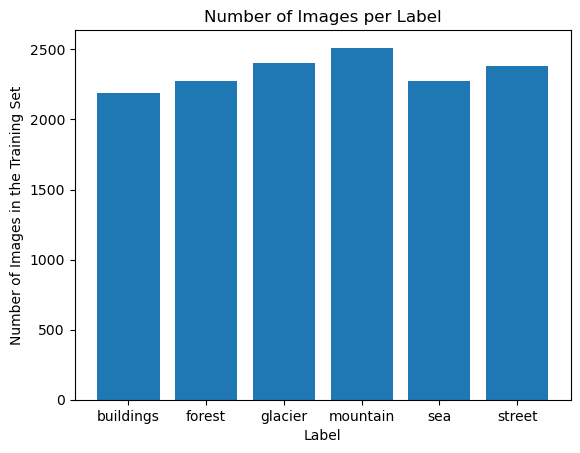

In [124]:
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

# Plot the number of images per label
plt.bar(class_names, train_counts )
plt.xlabel('Label')
plt.ylabel('Number of Images in the Training Set')
plt.title('Number of Images per Label')
plt.show()



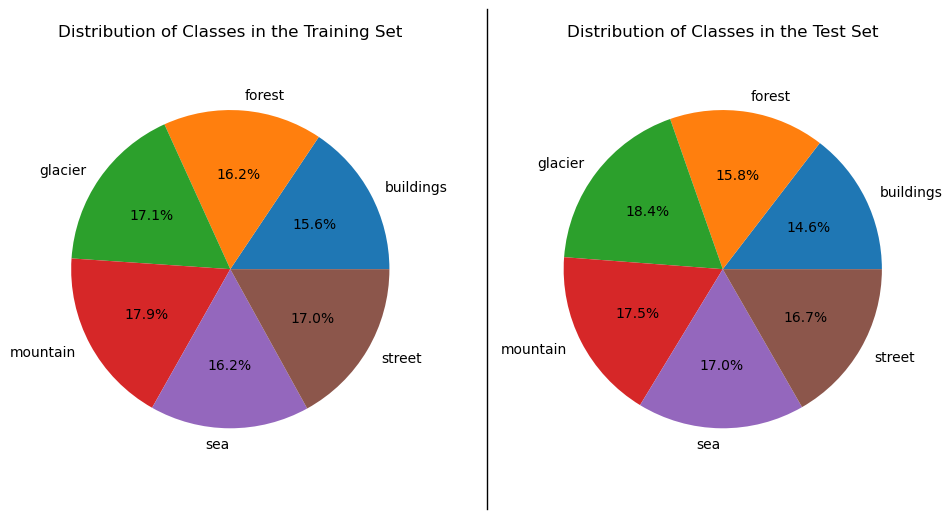

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
fig.subplots_adjust(wspace=50)  # Ajuste o espaço entre os gráficos

axs[0].pie(train_counts,
           explode=(0, 0, 0, 0, 0, 0),
           labels=class_names,
           autopct='%1.1f%%')
axs[0].axis('equal')

axs[1].pie(test_counts,
           explode=(0, 0, 0, 0, 0, 0),
           labels=class_names,
           autopct='%1.1f%%')
axs[1].axis('equal')

axs[0].set_title('Distribution of Classes in the Training Set')
axs[1].set_title('Distribution of Classes in the Test Set')

fig.canvas.draw()  
xline = 0.5 * (axs[0].get_position().x1 + axs[1].get_position().x0)
line = plt.Line2D([xline, xline], [0, 1], transform=fig.transFigure, color='black', linewidth=1)
fig.add_artist(line)

plt.tight_layout()
plt.show()